<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/Comp_neuro_problemset_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises week 1 (nonlinear dynamics)

In [6]:
# @title Dependencies
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from pylab import *
import numpy as np
import math
# suppress warnings
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import seaborn as sns
sns.set_theme('notebook')
sns.set_style('white')

## Problem 1. Newton's method <a id='Newton'></a>


### 1a) Solve using Newton's method by hand

Given is the equation:

$$
f(x) = x^2 - 2 = 0
$$

we use Newton's method, $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$, to get increasingly closer to the roots with initial value $x_1=2$. With this initial value we arrive at the roots with accuracy up to two decimal points in just 3 iterations. 

\begin{align}
x_1 &= 2 \\
x_2 &= 2 - \frac{f(2)}{f'(2)} = 2 - \frac{1}{2} = \frac{3}{2} \\
x_3 &= \frac{3}{2} - \frac{f(3/2)}{f'{3/2}} = \frac{3}{2} - \frac{1/4}{3} = \frac{17}{12} = 1.4166 \approx \sqrt{2}
\end{align}

### 1b) Implement Newton's method

We want to find the roots of the following function

$$
f(x) = x \exp(-x) + 1
$$

In [7]:
# define f(x)
f = lambda x,a: x * np.exp(-x) + a
# define df
df = lambda x,a: - np.exp(-x) * (x - 1)
# define range of input values 
function_values = f(np.linspace(-3, 3, num=100), a=1)

As suggested, we plot the function to make sure is not a nonsense function

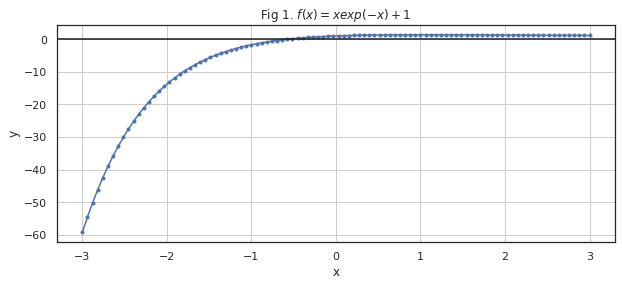

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(np.linspace(-3, 3, num=100), function_values, 'b.-');
ax.axhline(y=0, color='k', linestyle='-');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Fig 1. $f(x) = x exp(-x) + 1$')
plt.grid(True);

In [9]:
def newtons_method(f, df, x0, tolerance, iterations, a=1, verbose=True):
  '''Approximate solutions to f(x)=0 with Newton's method

  Parameters
  ----------
  f: function for which we want to find the roots

  df: the derivative of f(x)

  x0: initial value (guess)

  tolerance: stop when the function value at x is "close enough" to zero => abs(f(x)) < tolerance

  iterations: search is terminated after certain number of iterations

  Returns
  -------

  xn: approximate the roots in an iterative way with
      x = xn - f(xn)/df(xn)
  '''

  xn = x0 

  for n in range(0, iterations):
    fxn = f(xn,a) # obtain function value
    
    if abs(fxn) < tolerance:

      if verbose:
        print(f'The solution is {xn}, found after {n} steps')
        # display function for range of input values 

        fig, ax = plt.subplots(1, 1, figsize=(10,4))
        ax.plot(np.linspace(-3, 3, num=100), function_values, 'b.-');
        ax.axhline(y=0, color='r', linestyle='-');
        ax.set_title("Fig 2. Newton's method to find solution to f(x) = x exp(-x) + 1 = 0");
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.plot(xn, 0, 's', color='k')
        plt.grid(True);
      return xn
    
    dfxn = df(xn,a) # obtain derivative at function value

    if df(xn,a) == 0: # if function is not differentiable at this point
      if verbose == True:
        print('Function is not differentiable (df = 0), please try again')
      return 0

    # update xn
    xn -= fxn/dfxn # dfxn = tangent
  
  if verbose == True:
    print('Maximum iterations reached but no solution was found. Try again with a different guess, or check if your function has roots.')
  return 0

In [10]:
newtons_method(f,df,1,0.001,10, verbose=True);

Function is not differentiable (df = 0), please try again


In [11]:
newtons_method(f,df,-10,0.001,10, verbose=True)

Maximum iterations reached but no solution was found. Try again with a different guess, or check if your function has roots.


0

The solution is -0.567143290533261, found after 3 steps


-0.567143290533261

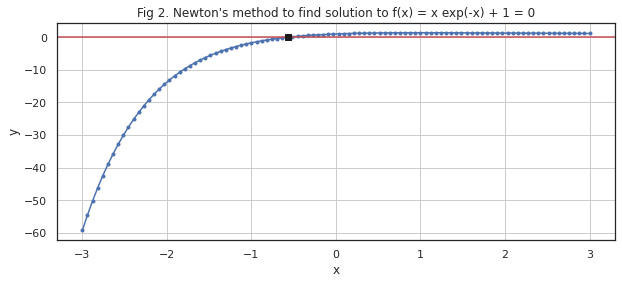

In [12]:
newtons_method(f,df,-0.5,1e-7,10, verbose=True)

Note that a downside of newtons method is that the success of this method depends on the maximum number of iterations allowed and initial value or guess we use. 

As is seen in one call of our function `newtons_method()` above, no solution was found with $x_0=-10$ and a maximum of 10 iterations: more iterations are needed to get to a solution. Furthermore, in order for the method to work the function needs to be differentiable at all points. That is, if the derivative at a point $x_n=0$, we cant use the tangent to get closer to the roots (this is also called a zero-division error). 

### 1c) Construct bifurcation diagram

We have 

$$
f(x) = x e^{-x}+a
$$

note that $f'$ is not affected by the parameter $a$

$$
\frac{df}{dx} = - e^{-x} (x - 1)
$$

In [13]:
a_values = np.linspace(-10, 10, num=100) # generate array with valus for a 
solutions_ourfunc = np.zeros(a_values.shape) 

for i, a in enumerate(a_values):
  approx = newtons_method(f, df, x0=-0.5, tolerance=1e-7, iterations=100, a=a, verbose=False)
  solutions_ourfunc[i] = approx if approx != 0 else np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


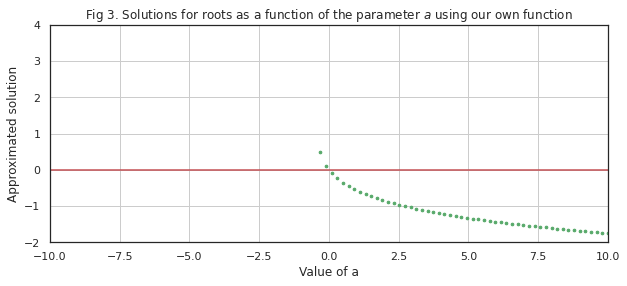

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set_title('Fig 3. Solutions for roots as a function of the parameter $a$ using our own function')
ax.scatter(a_values, solutions_ourfunc, color='g', s=7);
ax.axhline(y=0, color='r', linestyle='-');
ax.set_xlabel('Value of a');
ax.set_xlim(min(a_values), max(a_values))
ax.set_ylabel('Approximated solution')
ax.set_ylim(-2, 4)
ax.grid(True);

### 1d) Zero division errors

Given a function $f(x)$,  [scipy's function `fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) finds x such that $f(x) = 0$ using a starting estimate $x_0$.


In [15]:
a_values = np.linspace(-10, 10, num=100) # generate an array with valus for a 
solutions_fsolve = np.zeros(a_values.shape)

for i,a in enumerate(a_values):
  approx = fsolve(f, x0=-0.5, args=(a))
  solutions_fsolve[i] = approx if (f(approx, a) > -1E-12 and f(approx, a) < 1E-12 ) else np.nan # Output nan value if function filled in with solution does not approach zero

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


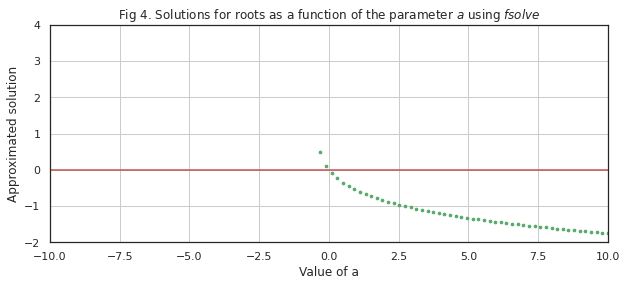

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set_title('Fig 4. Solutions for roots as a function of the parameter $a$ using $fsolve$')
ax.scatter(a_values, solutions_fsolve, color='g', s=7);
ax.axhline(y=0, color='r', linestyle='-');
ax.set_xlabel('Value of a');
ax.set_xlim(min(a_values), max(a_values))
ax.set_ylabel('Approximated solution')
ax.set_ylim(-2, 4)
ax.grid(True);

From *Fig 3 and 4* we can deduce that the solution of $f(x) = x e^{-x}+a = 0$ depends on the value of $a$. This is because the parameter $a$ shifts the function $f(x)$ horizontally. For values where $a \leq -0.3$ there are no roots to be found at the function won't intersect the x-axis at is point. We demonstrated this with a little animation below. Use the slider to change the value for $a$ and see what happens!

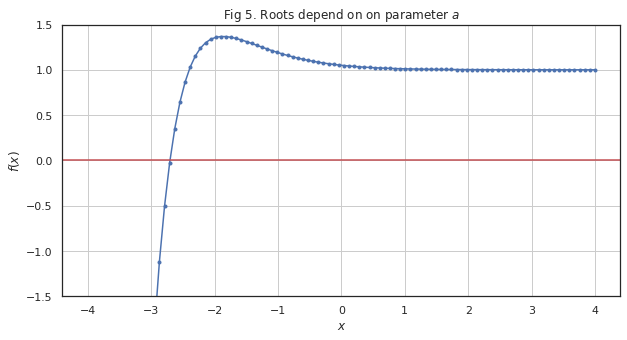

In [17]:
#@title Change value of a, then run this cell
a_param = 1 #@param {type:"slider", min:-10, max:10, step:0.5}
#print(number_slider)

# define f(x)
fx = lambda x,a: x * np.exp(-x) + a

# define range of input values 
output = fx(np.linspace(-3, 12, num=100), a_param)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.linspace(-4, 4, num=100), output, 'b.-');
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.set_ylim([-1.5, 1.5])
ax.set_title('Fig 5. Roots depend on on parameter $a$')
ax.axhline(y=0, color='r', linestyle='-');
plt.grid(True);

## Problem 2. Numerical methods


### 2 a,b) 

Given a differential equation $\dot y = f(x,y)$, we want to find $y$ as a function of $x$

$$
\dot y = f(x,y) = -2x-y
$$
with
$y(0)=-1$ on $ x \in [0,1]$

We are asked to solve the differential equation with Euler's method, Runge-Kutta and compare the solutions.


In [30]:
# specify input range
x = np.linspace(0,1,25) 
# initial value
y0 = -1 
# y' = f(x,y) 
ydot = lambda x,y: -2 * x - y 
# analytical solution
y_true = -2 * x - 3 * np.exp(-x) + 2

In [31]:
def ode_euler(f, y0, x, h):
  ''' Approximate the solution of y'=f(x,y) with euler's method.
  Parameters
  ----------
  f: the differential equation whose solution we want to approximate

  y0: initial value y(x0) = y0

  x: range of input values (numpy array)

  h: step size

  Returns
  --------
  y: approximation y_n of the solution y(x_n)
  '''
  y = np.zeros(len(x))
  x = np.zeros(len(x))
  y[0] = y0
  x[0] = 0

  for n in range(0, len(x)-1):
    x[n+1] = x[n] + h
    y[n+1] = y[n] + h * f(y[n], x[n])
  return y

In [35]:
def RK(f, y0, x, h):
  ''' Approximate the solution of y'=f(x,y) with RK method (second order).
  Parameters
  ----------
  f: the differential equation we want to approximate

  y0: initial value y(x=0)=y0

  x: range of input values (numpy array)

  h: step size

  Returns
  --------
  y: approximation y_n of the solution y(x_n)
  '''
  y = np.zeros(len(x))
  x = np.zeros(len(x))
  y[0] = y0
  x[0] = 0

  for n in range(0, len(x)-1):
    x[n+1] = x[n] + h
    y_wiggle = y[n] + h * f(y[n], x[n])
    y[n+1] = y[n] + h * (1/2) * (f(y[n], x[n]) + f(y_wiggle, x[n+1]))
  return y

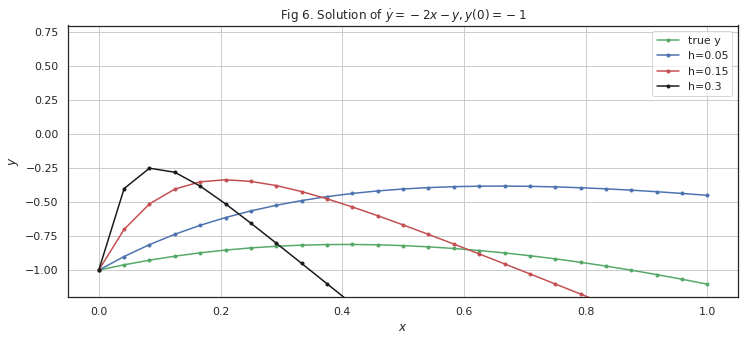

In [36]:
#@title Euler's method with different step sizes h

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.set_title('Fig 6. Solution of $\dot y = -2x -y, y(0)=-1$')
ax.plot(x, y_true,'g.-', label = 'true y') # plot analytical solution
ax.plot(x, ode_euler(ydot, y0, x, h=0.05) ,'.-', label ='h=0.05')
ax.plot(x, ode_euler(ydot, y0, x, h=0.15) ,'r.-', label ='h=0.15')
ax.plot(x, ode_euler(ydot, y0, x, h=0.3) ,'k.-', label ='h=0.3')
ax.set_ylim(-1.2, .8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True);

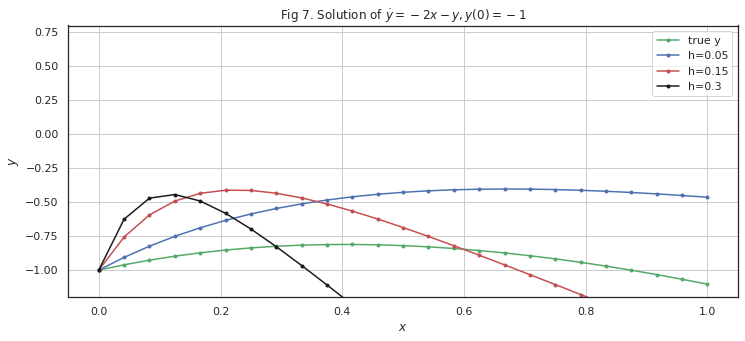

In [37]:
#@title Runge-Kutta method with different step sizes h
fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.set_title('Fig 7. Solution of $\dot y = -2x -y, y(0)=-1$')
ax.plot(x, y_true,'g.-', label = 'true y') # plot analytical solution
ax.plot(x, RK(ydot, y0, x, h=0.05) ,'.-', label ='h=0.05')
ax.plot(x, RK(ydot, y0, x, h=0.15) ,'r.-', label ='h=0.15')
ax.plot(x, RK(ydot, y0, x, h=0.3) ,'k.-', label ='h=0.3')
ax.set_ylim(-1.2, .8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True);

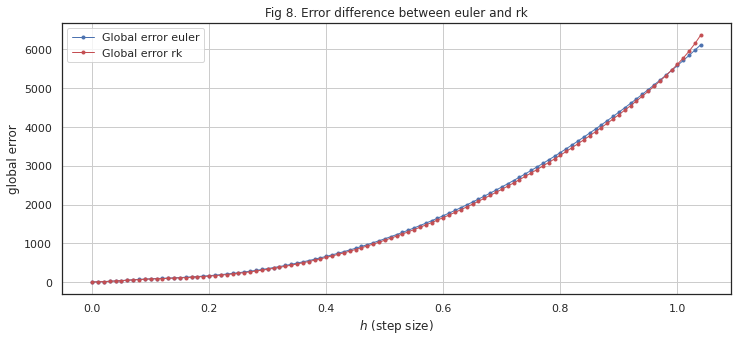

In [44]:
#@title Inspecting the accuracy of Euler and RK methods as a function of the step size, h

h_range = np.arange(0.00001, 1.05, step=.01) # different step sizes

global_error_eu = 0 
global_error_rk = 0 
h_errors_eu = np.zeros(len(h_range))
h_errors_rk = np.zeros(len(h_range))

for idx, h in enumerate(h_range):
  y_approx_eu = ode_euler(ydot, y0, x, h=h)
  y_approx_rk = RK(ydot, y0, x, h=h)

  for i, y_eu in enumerate(y_approx_eu):
    error_eu = abs(y_true[i] - y_eu)
    global_error_eu += error_eu

  for i, y_rk in enumerate(y_approx_rk):
    error_rk = abs(y_true[i] - y_rk)
    global_error_rk += error_rk

  h_errors_eu[idx] = global_error_eu
  h_errors_rk[idx] = global_error_rk

fig, ax = plt.subplots(1, 1, figsize=(12,5))

ax.plot(h_range, h_errors_eu, '.-', lw=1, label='Global error euler')
ax.plot(h_range, h_errors_rk, '.-r', lw=1, label='Global error rk')
ax.set_xlabel('$h$ (step size)')
ax.set_title('Fig 8. Error difference between euler and rk')
# ax.set_yscale('log')
ax.set_ylabel('global error')
ax.legend()
ax.grid(True);

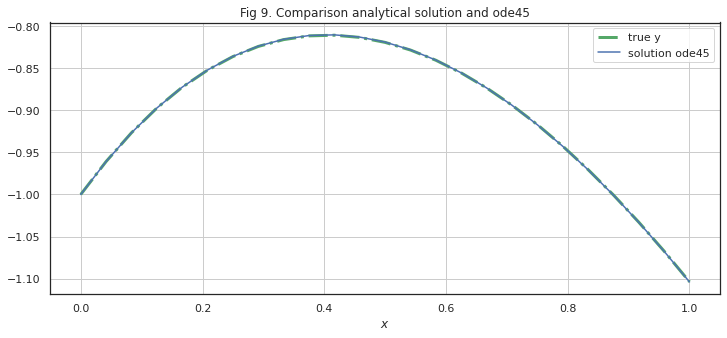

In [24]:
# @title Compare analytical solution with the approximation from 'ode45' (in python: RK45)
# solve with RK45 method
sol45 = solve_ivp(ydot, t_span = [0,1], y0 = [-1], method='RK45', dense_output=True)
z = sol45.sol(x) # specify x range

# x = np.linspace(0, 1, 300)
y_true = -2 * x - 3 * np.exp(-x) + 2 # analytical solution

fig, ax = plt.subplots(1, 1, figsize=(12,5))
ax.plot(x, y_true,'-.g', label = 'true y', lw=3)
ax.plot(x, z.T, label='solution ode45', lw=1.5)
ax.set_xlabel('$x$')
ax.set_title('Fig 9. Comparison analytical solution and ode45')
ax.legend()
ax.grid(True);

#### 2 (a,b) Conclusions
----

First of all, we note that the RK method (second order) is a much better approximation to the true solution than Euler's method.

Regarding errors, we show in *Fig 8* that the global error of euler's method grows linearly as a function of the step size $h$. Both methods start out with the same accuracy, yet the global error of euler's method grows faster than the modified (rk) method, whose global error grow decays as $h \rightarrow 1$. 

When we plot the RK45 approximation and the true solution they align perfectly. As such we conclude that there is no observable difference and the RK45 method is an accurate approximation for $y$.

### 2c) Reduce second order DE to a system of first order DEs

We were given that

$$
\frac{d^2 \theta}{dt^2} = - \sin (\theta) + I 
$$

and wish to rewrite this as a system of first order differential equations, specifying $y_1$ and $y_2$. We can do so with a simple change of variable. 

\begin{align}
y_1 &= \theta \\
y_2 &= \frac{d{\theta}}{dt} 
\end{align}

Notice that if we differentiate both sides we obtain

\begin{align}
\dot y_1 &= \frac{d{\theta}}{dt} = y_2 \\
\dot y_2 &= \frac{d}{dt} \frac{d{\theta}}{dt} = I - \sin(\theta)
\end{align}

<!-- $$
y_2 = \dot y_1 = \dot \theta = \frac{d \theta}{dt} \\
\dot y_2 = \ddot \theta = \frac{d^2 \theta}{dt^2} \\
$$ -->

We can integrate $\dot y_2$ to find $y_2$

$$
y_2 = \int -sin(\theta) + \, I\:dt \\
= I t + \cos(\theta) + c \\
$$

### 2d) Phase plane with modified euler method





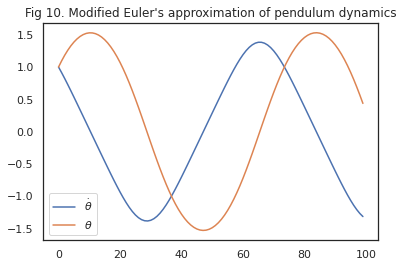

In [25]:
#@title Modified Euler's approximation of pendulum dynamics
I = 0 #@param {type:"slider", min:-10, max:10, step:0.5}

# Modified Euler: 
n = 100 # nr of timesteps
y = np.zeros(n)
x = np.ones(n)
y0 = 1 
x0 = 1
h = 0.1
y[0] = y0 
x[0] = x0

for n in range(0, n-1):

  # At n+1, what are the derivative of y and x?
  x_prime = (y[n])
  x[n+1] = x[n] + h * x_prime # derivative of x -> x' = y

  y_prime = (-np.sin(x[n]) + I)
  y[n+1] = y[n] + h * y_prime
  x_prime_new = (y[n+1])
  y_prime_new = (-np.sin(x[n+1]) + I)

  # Now overwrite these steps
  x[n+1] = x[n] + h * (1/2) * (x_prime + x_prime_new) # derivative of x -> x' = y
  y[n+1] = y[n] + h * (1/2) * (y_prime + y_prime_new)

plt.plot(arange(n+2), y, label = r"$\dot \theta$")
plt.plot(arange(n+2), x, label = r"$\theta$")
plt.title('Fig 10. Modified Euler\'s approximation of pendulum dynamics')
plt.legend();

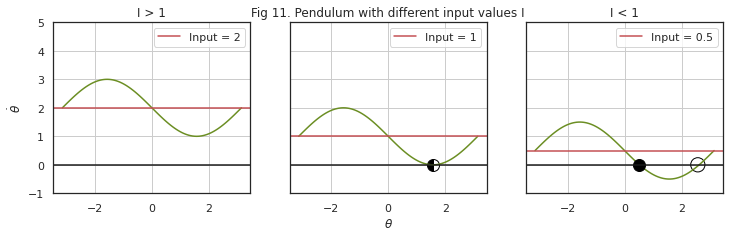

In [26]:
#@title Bonus: pendulum with different input values *I*
theta = np.linspace(-pi, pi, 100)
theta_dot = lambda I: I + -sin(theta)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex = True, sharey = True)
I = 2
ax1.grid(True)
ax1.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax1.set_ylabel(r'$\dot \theta  $')
ax1.set_title('I > 1')
ax1.set_ylim(-1, 5)
ax1.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax1.axhline(y=0, color='k', linestyle='-')
ax1.legend()
ax1.set_aspect(1)

I = 1
ax2.grid(True)
ax2.plot(pi/2, 0, fillstyle="left", color='black', linestyle=':', marker='o',
                    markersize=12, markerfacecoloralt='white')
ax2.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax2.set_xlabel(r"$\theta$")
ax2.set_title('I = 1')
ax2.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax2.axhline(y=0, color='k', linestyle='-')
ax2.legend()
ax2.set_aspect(1)
ax2.set_title('Fig 11. Pendulum with different input values I')

I = 0.5
ax3.plot(theta, theta_dot(I), color = 'olivedrab') # strogatz p. 104
ax3.set_title('I < 1')
ax3.plot(pi/6, 0, fillstyle="left", color='black', linestyle=':', marker='o',
                    markersize=12, markerfacecoloralt='black')
draw_circle = plt.Circle((1+pi/2, 0), 0.25, fill = False, edgecolor = 'black')
ax3.set_aspect(1)
ax3.add_artist(draw_circle)
ax3.axhline(y=I, color='r', linestyle='-', label = ("Input = " + str(I)))
ax3.axhline(y=0, color='k', linestyle='-')
ax3.legend()
ax3.grid(True)


The behaviour of the pendulum depends on the input $I$, which horizontally translates the sine wave. 
When $I = 1$, i.e. when the input is equal to the amplitude of the sine wave, a saddle-node bifurcation can be found at $\theta = \pi/2$. 
When $I < 1$, there is a stable ($\theta = \frac{\pi}{6}$) and an unstable ($\theta = 1\frac{\pi}{2}$) fixed point.
When $I > 1$, the system does not reach a fixed point because the input is sufficently large to move the sine wave away from crossing the x-axis (when $ \dot\theta = 0)$.

### 3a) Solve a second-order differential equation analytically

We determine the analytical solution of the *homogeneous* second-order DE 

$$
y + by' + y = 0
$$

by following the following 3 steps:

---

$\color{darkgreen}{(1)}$ Try $y = e^{\lambda x}$ to obtain the characteristic equation $a\lambda^2 + b \lambda + c=0$

---

---

$\color{darkblue}{(2)}$ Solve the characteristic equation, giving $\lambda_1$ and $\lambda_2$ as roots.

---

---

$\color{darkred}{(3)}$ Determine the nature of the solution.

---

$\color{darkgreen}{(1)}$
$$
(e^{\lambda x})'' + b(e^{\lambda x})' + e^{\lambda x} = 0 \\
e^{\lambda x}(\lambda^2 + b\lambda + 1) = 0 \\
\lambda^2 + b \lambda + 1 = 0
$$

which is an ordinary quadratic equation with solution:

$$
y(x) = c_1 \exp(\lambda_1 x) +  c_2 \exp(\lambda_2 x)
$$


$\color{darkblue}{(2)}$
We can use the quadratic formula to identify the roots $\lambda_1$ and $\lambda_2$

$$
\lambda_{1,2} = \frac{-b ± \sqrt{b^2-4ac}}{2a} \\
  = \frac{-b ± \sqrt{b^2-4}}{2}
$$

$\color{darkred}{(3)}$
The fixed points can thus be characterised as follows for different values of $b$:

- if $−∞ < b ≤ −2$ the solution blows up (**unstable node**)
- if $−2 < b < 0$ the solution is blow-up oscillatory (**unstable spiral**)
- if $b = 0$ the solution is oscillatory (**limit cycle**)
- if $0 < b < 2$ the solution is damped oscillatory (**stable spiral**)
- if $2 ≤ b < ∞$ the solution is damped (**stable node**) 

---

**example 1:** $b=2$

$(2)^2 - 4 = 0 \Rightarrow \lambda_1 = \lambda_2 = \lambda$ is one real root

specifically we have 

$$
\lambda = \frac{-2 ± 0}{2} = -1
$$

and our general solution is 

$$
y(x) = (c_1 + c_2x) e^{-1x}
$$

---

**example 2:** $b=3$

$(3)^2 - 4 = 5 (> 0) \Rightarrow  \lambda_1 \neq  \lambda_2$ are both real

specifically we have 

$$
\lambda_{1,2} = \frac{-3 ± 5}{2} \\
\lambda_1 = \frac{2}{2} = 1 \qquad  \lambda_2 = \frac{-8}{2} =-4
$$

and our solution is 

$$
y(x) = c_1e^{x}+c_2 e^{-4x}
$$

---

**example 3:** $b=1$

$$(1)^2 - 4 = -3 (< 0) \Rightarrow  \lambda_1 \neq  \lambda_1 =  \lambda ± i\mu$$  form a complex conjugate

specifically we have 

$$
\lambda_{1,2} = \frac{-1 ± \sqrt{-3}}{2} \\ 
\lambda_1 
= - \frac{1}{2} + i \frac{\sqrt{3}}{2} \qquad 
\lambda_2 = - \frac{1}{2} - i \frac{\sqrt{3}}{2} \\
$$

Substituting the real parts $\lambda$ and the imaginary parts $\mu$ in the general solution gives 

$$
y(x) = c_1 e^{\lambda x} \cos (\mu x) + c_2 e^{\lambda x} \sin (\mu x) \\
y(x) = c_1 e^{-\frac{1}{2} x} \cos (\frac{\sqrt{3}}{2} x) + c_2 e^{-\frac{1}{2} x} \sin (\frac{\sqrt{3}}{2} x)
$$

---

Note that we need an IVP in order to determine the constants $c_1, c_2$

### 3b) Rewrite and analyse system of first order ODEs

We can write higher order differential equations as a system with a very simple change of variable. Recall that we have
$$
y'' + b y' + ay = 0 
$$
with $a=1
$

We define 
$$
y_1 = y'
$$

which means that
$$
y_1' = y'' = −b y_1 − y_2 
$$
giving the following system of two coupled first order ODEs:

\begin{align}
y_1' &= −b y_1 − y_2 \\
y_2' &= y_1
\end{align}

We linearise this system around the origin by computing the Jacobian centered at $y_1, y_2 = (0,0)$:

$$
J_{(0,0)}
= \begin{pmatrix}
-b & -1 \\
1 & 0
\end{pmatrix}
$$

The stability of the FP at the origin is determined by the eigenvalues. The eigenvalues are computed as:

\begin{align} 
  \lambda_{1,2} = \frac{\text{tr}[J] ± \sqrt{\text{tr}[J]^2-4 \det [J]}}{2}
\end{align}

Calculating the trace and determinant yields:

\begin{align}
  \text{tr}[J] &= -b + 0 = -b \\
  \det [J] &= -b \cdot 0 --1 \cdot 1 = 1
\end{align}

Hence, the FP is characterised as follows (depending on the value of $b$):

- if $−∞ < b ≤ −2$ the solution blows up (**unstable node**)
- if $−2 < b < 0$ the solution is blow-up oscillatory (**unstable spiral**)
- if $b = 0$ the solution is oscillatory (**limit cycle**)
- if $0 < b < 2$ the solution is damped oscillatory (**stable spiral**)
- if $2 ≤ b < ∞$ the solution is damped (**stable node**) 

###3c) Stability of second order DE at the origin 

We have a second-order nonlinear ordinary differential equation

$$
y'' + (y')^3 + y = 0
$$

we can understand the stability at the origin by rewriting it as a system of first order differential equations. 

let 

$$
y(t) = y_1 \\
y' = y_2
$$

differentiating both variables now gives a system of first order differential equations

$$
y_1' = y_2 \\
y_2' = -b (y_2)^3 - y_1
$$

which we represent in vector form

$$
V 
= \begin{pmatrix}
y_2 \\
-b (y_2)^3 - y_1 
\end{pmatrix}
$$



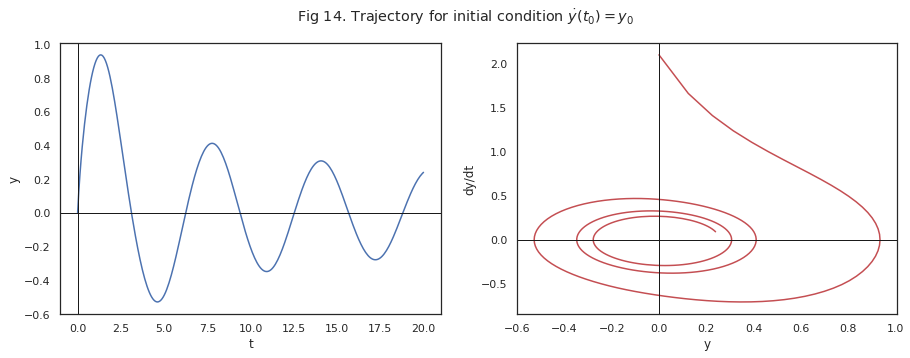

In [28]:
#@title Plot trajectories in the phase space (change the slider and run!)
y0 = 2.1 #@param {type:"slider", min:0.1, max:4, step:0.2}

# convert to function that scipy is able to interpret
def system(t, V, b=1):
  '''
  t: independent variable

  V: 2D vector containing system of first order DE's
  '''
  y1, y2 = V 
  return [y2, -b * y2**3 - y1]

# set number of evaluation points
timeseries = np.linspace(0,20,300) 

# solve IVP with pythons equivalent of ode45
ivp_sol = solve_ivp(system, t_span=[0,50], y0=[0,y0], t_eval=timeseries) 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle(r'Fig 14. Trajectory for initial condition $\dot y(t_0)=y_0$');
ax1.plot(ivp_sol.t, ivp_sol.y[0], '-');
ax1.axvline(x=0, color='k', linestyle='-', lw=1)
ax1.axhline(y=0, color='k', linestyle='-', lw=1)
ax1.set_xlabel('t')
ax1.set_ylabel('y')

ax2.plot(ivp_sol.y[0], ivp_sol.y[1], '-r');
ax2.axvline(x=0, color='k', linestyle='-', lw=1)
ax2.axhline(y=0, color='k', linestyle='-', lw=1)
ax2.set_xlabel('y')
ax2.set_ylabel('dy/dt');

### Conclusion 3c)

----

Solving this second order nonlinear differential equation was tough (believe us, we tried). Luckily, we can discover the stability of the fixed point at the origin in a qualitative fashion, by considering a few different trajectories in phase space. 

Through playing around with the above interative visualisation for different trajectories in the phase space (try changing the slider from $y0 = 0.1$ to $y=1.6$ for example) we conclude that the fixed point is a stable fixed point. More specifically, it is an attractor as solutions will go there over time. 


# Week 1 theory


## Dynamics and bifurcations 

We use dynamical systems theory to describe the nonlinear dynamics of neurons. 

The trajectory of a dynamical system depends on the *initial conditions*. There are certain points in the phase space that when reached, stay there. These are *fixed points* (FPs). Their stability is determined by giving the point a little nudge, often denotes by $\delta$. If, upon this nudge or perturbation, the solution moves away from the fixed point, it is *unstable* (the perturbation increases over time). If it goes back to the fixed point it is *stable* (the perturbation decreases over time). 

Solving differential equation in practice is often done with numerical methods, such as [Euler's method](#scrollTo=N9IO-m-1a8QM&line=7&uniqifier=1) or [Runge-Kutta](#scrollTo=ASTP7ffKD9Sr&line=14&uniqifier=1), to study the behaviour of the systems at hand. 


---

> **Euler's method** numerically approximates the solution to a first order differential equation. It is a first order method, which implies that the local error (per iteration) is proportional to the square of the step size. The Euler method is:
$$
y_{n+1} = y_n + h f(x_n, y_n)
$$
Note that this method yields large errors because the derivative may change a lot during one integration step.

---

---

> **Runge-Kutta method** is a modified Euler method that involves two steps: a look-ahead step $\tilde y$ and then a final step. This method is 4 times more accurate than the standard Euler method:
$$
\tilde y_{n+1} = y_n + hf(x_n,y_n) \\
y_{n+1} = y_n + \frac{1}{2} hf(x_n,y_n) + f(x_n + h, \tilde y_{n+1}))\\
$$

---

Simple systems can also be analysed analytically. We can characterise the nature of FP's by looking at the Jacobian. 


Constructing bifurcation diagrams involves finding the roots of nonlinear equations. [Newtons method](#scrollTo=vEsZSiyTbM88&line=1&uniqifier=1) is a way to find roots. This method is fast because it converges quadratically to a root, that is, the number of correct digits doubles with each iteration. It also means that it is unstable.

---

> **Newton's method** iteratively finds a new point $x_{n+1} = x + h$ that is closer to 0.
- Start with arbitrary initial value $x_0$, where $x_0 \neq 0$
- Take a step: $x_{n+1}= x_n - \frac{f(x_n)}{f'(x_n)}$

---




### One dimensional bifurcation types

First, we linearise around the fixed point. Let $\delta$ denote a small perturbation around the FP $y^{*}$. The perturbation is equal to the state of the system at $t$ and the state at the FP
\begin{align}
  \delta &= x(t) - x^{*} \\
  \dot \delta &= \frac{dx}{dt}(x - x^{*}) = \dot x
\end{align}

Taylor expansion yields

\begin{align}
  f(x^{*} + \delta) &= f(x^{*}) + \delta f'(x^{*}) + \text{h.o.t} 
\end{align}

note that $f(x^{*}) = 0$ (by definition, $f$ doesn't change at the FP) and we can ignore the higher order terms. This leaves us with
\begin{align}
  \dot \delta \approx \delta f'(x^{*})
\end{align}

What we have done is taking a small perturbation and then pretending that we have created a linear system where $\dot \delta$ is now a scaled version of $\delta$ (the term $\delta f'(x^{*})$ is just a scalar). Why did we do this? Because we ended up with a differential equation of the standard form
\begin{align}
  \frac{dy}{dt} = a y
\end{align}
which is very easy to solve!

The behaviour of the perturbation is thus exponential.

\begin{align}
\dot x =
  \begin{cases} 
  \text{unstable (perturbation increases (exponentially) over time)} & f'(x) > 0 \\ 
  \text{unclear (explore h.o.t)} & f'(x) = 0 \\ 
  \text{stable (perturbation decays over time)} & f'(x) < 0 \\ 
  \end{cases} 
\end{align}
<!-- 
where $\alpha$ indicates the derivative of $y$ at the fixed point. 
-->


The following are standard bifurcations in 1D:

**Transcritical bifurcation**

- example: $\dot y = f(y) = y(r-y)$
- FP's: $y^* = 0, r$
- Stable: $r > 0$ 
- Unstable:  $r < 0$

**Saddle-node bifurcation**

- example: 
- FP's: 
- Stable:
- Unstable: 

**Supercritical pitchfork bifurcation**


**Subcritical pitchfork**






### Two dimensional bifurcation types

Consider a dynamical system of the form

\begin{align}
    \dot x = \frac{dx}{dt} = f(x,y) \\
    \dot y = \frac{dx}{dt} = g(x,y)
\end{align}

and recall that we eventually want to linearise around the FP by taking the eigenvalues of the Jacobian.

Let's say we have a linear system with parameters $a,b,c,d$

\begin{align}
  \dot x &= ax + by \\
  \dot y &= cx + dy
\end{align}

This can be written in matrix form as

\begin{align}
\frac{d}{dt} \begin{pmatrix} x \\ y \end{pmatrix} &=
\begin{pmatrix} a & b \\ c & d \end{pmatrix} 
\begin{pmatrix} x \\ y \end{pmatrix} \\
 \mathbf{\dot x} &= \mathbf{A}\mathbf{x} 
\end{align}

**Example.**

\begin{align}
\begin{pmatrix} \dot x \\ \dot y \end{pmatrix} 
&= \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} 
\begin{pmatrix} x \\ y \end{pmatrix} \\ 
\end{align}

Matrix multiplication yields

\begin{align}
  \dot x &= ax \\
  \dot y &= -y
\end{align}

Since these equations are uncoupled (their derivatives to not depend on eachother) each equation can be solved separately, which yields

\begin{align}
  x(t) &= x_0 e^{at} \\
  y(t) &= y_0 e^{-t} 
\end{align}

The behaviour for different values of $a$ is then

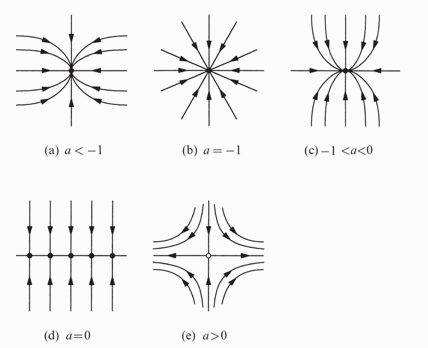


Note that these are all straight-line directories along the x and y axes



We want to get **straight-line trajectories** for arbitrary linear systems. These are trajectories starting on one of the coordinate axes (x,y) and stay on them forever, exhibiting simple exponential growth or decay [Strogatz section 5.2].

For general cases we want solutions of the form
\begin{align}
  \mathbf{x}(t) = e^{\lambda t} \mathbf{v}
\end{align}
Plugging $\mathbf{x}(t)$ into $\mathbf{\dot x} =  \mathbf{A}\mathbf{x}$ yields
\begin{align}
   \mathbf{A}\mathbf{v} = \lambda\mathbf{x}
\end{align}

The eigenvectors of $\mathbf{A}$ give the directions of straight-line trajectories and the eigenvalues tell us *how* the system moves along those axes. We end up with the general solution in the form

\begin{align}
   \mathbf{x}(t) = c_1 e^{\lambda_1} \mathbf{v}_1 + c_2 e^{\lambda_2} \mathbf{v}_2
\end{align}

Just by knowing the eigenvalues we can learn a lot about the system's behaviour. 

Note that complex eigenvalues indicate spiral behaviour (rotations).

As in 1D, we observe the effect of a small perturbation $\delta$ to understand the system’s behavior near this point

\begin{align*}
    \delta \mathbf{x} 
    &= \begin{pmatrix} 
    x^* + \delta x(t) \\
    y^* + \delta y(t) \\
    \end{pmatrix} \\
    \text{in  other words} \\
    \delta \mathbf{x} 
    &= (\delta x, \delta y)^T
\end{align*}

Assuming the perturbation $(\delta x(t), \delta y(t))$ is very small, we can do the multivariate Taylor expansion and ignore the quadratic terms to obtain the Jacobian. We write this approximation in matrix notation as follows

\begin{align*}
    \frac{d \mathbf{x}}{dt}
&= \mathbf{J}_{(x^{*}, y^{*})} \mathbf{x}
\end{align*}
where 
\begin{align*}
    \mathbf{x}
&= \begin{bmatrix} 
\delta x \\
\delta y \\
    \end{bmatrix} \\
\end{align*}
and 
\begin{align*}
    \mathbf{J} 
&= \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}  \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}  \\
\end{bmatrix}
\end{align*}
is the Jacobian.

We have evaluated a linear system by taking the eigenvalues of the the Jacobian at the FP. This yields a linear dynamical system that we can actually solve. We now continue with the general solution

\begin{align*}
    x(t) = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2
\end{align*}

where $\lambda_1, \lambda_2$ and $\mathbf{v}_1, \mathbf{v}_2$ are the eigenvalues and eigenvectors of the 2×2 Jacobian matrix $\mathbf{J}$. Thus, if $\Re(\lambda_1),\Re(\lambda_2) < 0$, we know that $e^{\lambda_1 t}, e^{\lambda_2 t} \rightarrow 0$ and therefore $(\delta x, \delta y) \rightarrow 0$ as $t \rightarrow \infty$, so we can conclude that $(x^∗,y^∗)$ is a stable fixed point. 

Otherwise, $(x^∗,y^∗)$ could be either unstable, a saddle node, or a limit cycle (see table below). We therefore need only calculate the eigenvalues of the Jacobian matrix $\mathbf{J}$ to determine qualitative behavior around the fixed point $(x^∗,y^∗)$:

\begin{align*}
    \mathbf{J}\mathbf{v} = \lambda \mathbf{v} \\
    \Leftrightarrow (\mathbf{J} - \lambda \mathbf{I}) = \mathbf{0} \\
    \Rightarrow |\mathbf{J} - \lambda \mathbf{I}| = \mathbf{0} \text{ for nonzero } \mathbf{v} \\
    \Leftrightarrow \lambda^2 - \underbrace{Tr[\mathbf{J}]}_{\text{T}} + \underbrace{|\mathbf{J}|}_{\text{D}} = 0 \\
    \Rightarrow \lambda ± = \frac{T ± \sqrt{T^2-4D}}{2}
\end{align*}

where the third line follows from the fact that, for there to be a non-zero vector $\mathbf{v}$ that satisfies the equation in the second line, the matrix $\mathbf{J} - \lambda \mathbf{I}$ must have a non-zero nullspace and therefore not be full-rank, which implies that its determinant $|\mathbf{J} - \lambda \mathbf{I}|$ must be $0$. We can thus derive the following conditions for stability of the fixed point:

\begin{align*}
    T < 0 \\
    D > 0
\end{align*}

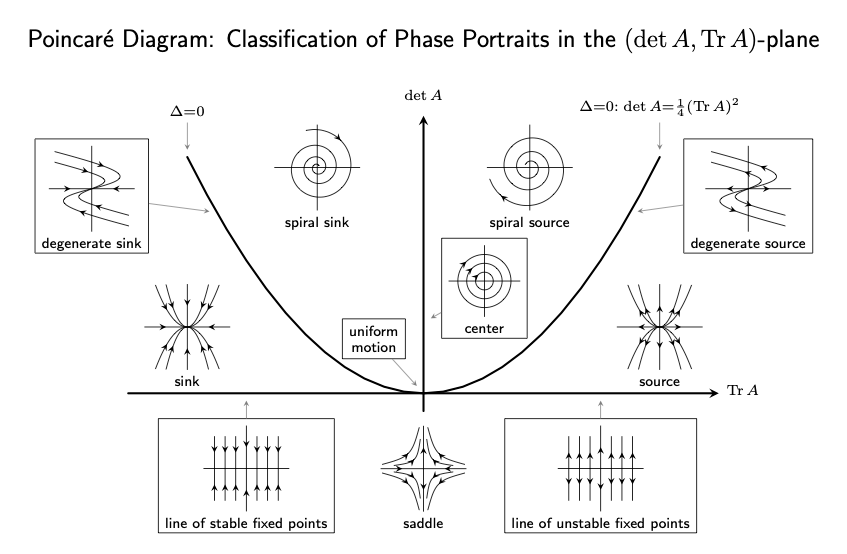

```
By Daphne Cornelisse & Kyra Evers
Computational Neuroscience (3EC) 
January 2021
```